# Library & Data Import

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('final_crimes.csv')

# Logistic Regression Preprocessing

In [4]:
    #create 10 dummy variables for the 'Location Description' columns
dummy = pd.get_dummies(dataset['Location Description'])
#dummy

In [5]:
    #concatenate dummy variables w/ rest of dataframe
new_df = pd.concat([dataset, dummy], axis=1)
new_df.head()

,Date,ID,Date.1,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Location,Year,Month,Day,Hour,Minute,Second,Primary Type Corr,Primary Type Test,Type_factor,Alley,Apartment,Other,Parking Lot,Residence,Retail,Road,School,Sidewalk,Transport Site
0,2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,Residence,False,True,935,9.0,11.0,61.0,26,1173974.0,1876757.0,"(41.817229156, -87.637328162)",2003,3,1,0,0,0,0,OTHER OFFENSE,0,0,0,0,0,1,0,0,0,0,0
1,2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,Residence,False,False,2233,22.0,34.0,49.0,06,1174948.0,1831051.0,"(41.691784636, -87.635115968)",2003,5,1,1,0,0,1,THEFT,1,0,0,0,0,1,0,0,0,0,0
2,2001-01-01 11:00:00,4791194,2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,Residence,True,True,531,5.0,9.0,50.0,02,1182247.0,1829375.0,"(41.687020002, -87.60844523)",2001,1,1,11,0,0,2,CRIM SEXUAL ASSAULT,2,0,0,0,0,1,0,0,0,0,0
3,2003-03-15 00:00:00,4679521,2003-03-15 00:00:00,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,Residence,False,False,2222,22.0,21.0,73.0,26,1169911.0,1844832.0,"(41.729712374, -87.653158513)",2003,3,15,0,0,0,0,OTHER OFFENSE,0,0,0,0,0,1,0,0,0,0,0
4,2003-01-01 00:00:00,4680124,2003-01-01 00:00:00,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,Residence,False,False,1134,11.0,24.0,29.0,06,1154521.0,1895755.0,"(41.869772159, -87.708180162)",2003,1,1,0,0,0,1,THEFT,1,0,0,0,0,1,0,0,0,0,0


In [6]:
new_df.columns

Index(['Date', 'ID', 'Date.1', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Location', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'Primary Type Corr', 'Primary Type Test', 'Type_factor', 'Alley',
       'Apartment', 'Other', 'Parking Lot', 'Residence', 'Retail', 'Road',
       'School', 'Sidewalk', 'Transport Site'],
      dtype='object')

# First iteration

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
    # Iteration 1
X = new_df[['Domestic', 'Beat', 'District', 'Ward', 'Community Area',
            'X Coordinate', 'Y Coordinate', 'Year', 'Month', 'Type_factor',
            'Alley', 'Apartment', 'Other', 'Parking Lot', 'Residence', 'Retail', 
            'Road', 'School', 'Sidewalk', 'Transport Site']]

    #convert 'Arrest' to Boolean
Y = new_df['Arrest'].astype('uint8')
Y = new_df['Arrest']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [10]:
logreg1 = LogisticRegression(class_weight = 'balanced').fit(X_train, y_train)
#logreg1 = LogisticRegression().fit(X_train, y_train)

print("lr.coef_:", logreg1.coef_)
print("lr.intercept_:", logreg1.intercept_)

print("Training set score: {:.3f}".format(logreg1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg1.score(X_test, y_test)))

lr.coef_: [[-4.31767295e-01 -3.77891493e-06 -6.02894258e-03 -3.46077389e-03
  -3.31231822e-04 -3.04126608e-06  2.14812419e-06 -9.43120334e-04
  -9.56713619e-03  2.94323167e-01  1.91310577e-01 -6.06891319e-01
   2.75464493e-01 -2.35816031e-01 -6.92459438e-01  1.63915393e+00
  -2.97224980e-01 -4.71246697e-01  1.70903104e-01  3.21228552e-02]]
lr.intercept_: [0.00531649]
Training set score: 0.746
Test set score: 0.747


# First iteration - Model Evaluation

In [11]:
    #Evaluating iteration 1
y_pred1 = logreg1.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred1))

[[1145214  392954]
 [ 150425  454973]]


In [12]:
    #precision & accuracy scores
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred1)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred1)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred1)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred1)))

Precision score: 0.5366
Recall score: 0.7515
Accuracy score: 0.7465
F1 score: 0.6261


In [13]:
from sklearn.metrics import roc_auc_score
lr1_auc = roc_auc_score(y_test, logreg1.predict_proba(X_test)[:,1])

print("AUC for logistic regression: {:.3f}".format(lr1_auc))

AUC for logistic regression: 0.824


Text(0, 0.5, 'Recall')

Text(0.5, 0, '1-specificity')

Text(0.5, 1.0, 'ROC Curve')

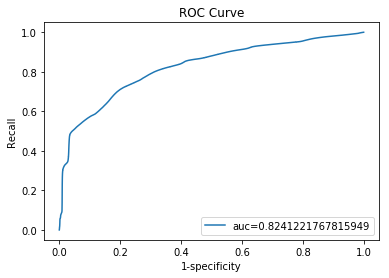

In [14]:
from sklearn.metrics import roc_curve

y_pred_proba = logreg1.predict_proba(X_test)[::,1]

fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

# Second Iteration

In [15]:
    # Iteration 2
X2 = new_df[['Beat', 'District', 'Ward', 'Community Area', 'Year', 'Month', 'Type_factor']]
Y2 = new_df['Arrest'].astype('uint8')

In [16]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=0)

In [17]:
logreg2 = LogisticRegression(class_weight = 'balanced').fit(X_train2, y_train2)

print("lr.coef_:", logreg2.coef_)
print("lr.intercept_:", logreg2.intercept_)

print("Training set score: {:.3f}".format(logreg2.score(X_train2, y_train2)))
print("Test set score: {:.3f}".format(logreg2.score(X_test2, y_test2)))

lr.coef_: [[ 8.35121277e-06 -8.96400768e-03  1.11301105e-03 -4.80443149e-03
  -6.73785030e-04 -7.77834939e-03  2.70510600e-01]]
lr.intercept_: [5.00844559e-05]
Training set score: 0.728
Test set score: 0.728


# Second Iteration - Model Evaluation

In [18]:
    #Evaluating iteration 2
y_pred2 = logreg2.predict(X_test2)

print(confusion_matrix(y_test2, y_pred2))

[[1110861  427434]
 [ 155622  449649]]


In [19]:
    #precision & accuracy scores
print('Precision score: {:.4f}'.format(precision_score(y_test2,y_pred2)))
print('Recall score: {:.4f}'.format(recall_score(y_test2,y_pred2)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test2,y_pred2)))
print('F1 score: {:.4f}'.format(f1_score(y_test2,y_pred2)))

Precision score: 0.5127
Recall score: 0.7429
Accuracy score: 0.7280
F1 score: 0.6067


In [20]:
lr2_auc = roc_auc_score(y_test2, logreg2.predict_proba(X_test2)[:,1])

print("AUC for logistic regression: {:.3f}".format(lr2_auc))

AUC for logistic regression: 0.798


Text(0, 0.5, 'Recall')

Text(0.5, 0, '1-specificity')

Text(0.5, 1.0, 'ROC Curve')

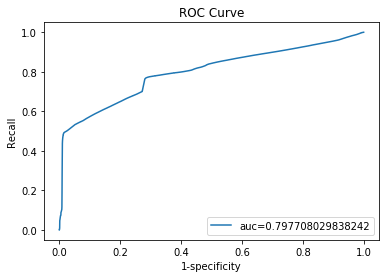

In [21]:
y_pred_proba2 = logreg2.predict_proba(X_test2)[::,1]

fpr, tpr, threshold = roc_curve(y_test2,  y_pred_proba2)
auc = roc_auc_score(y_test2, y_pred_proba2)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()